# Introduction

In [2]:
# TODO

# Imports

In [3]:
import numpy as np
np.set_printoptions(precision=2, threshold=2)
import random
random.seed(1)
from neural_net import (NeuralNetwork, 
                        Layer, 
                        Linear)
from activation_functions import sigmoid
from helpers import (get_mnist_X_Y, 
                     momentum_range,
                     _plot_learning_rate_decay)
from python_custom.misc import (numpy_round, 
                                list_index_wraparound)
%matplotlib inline

Neural nets here are defined as a series of layers, each of which gets values from a prior layer and then feeds that information through an activation function into the next layer.

# Baseline neural net - TODO: write helper functions for this

In [4]:
X, Y = get_mnist_X_Y()

In [5]:
nn_mnist = NeuralNetwork(
    layers=[
        Linear(n_in=784,
               n_out=50,
               activation_function=sigmoid, 
               random_seed=1),
        Linear(n_in=50,
               n_out=10,
               activation_function=sigmoid, 
               random_seed=2)
        ]
    )

In [6]:
# TODO: make this a class method
def neural_net_pass(net, x, y):
    pred = net.forwardpass(x)
    loss = net.loss(pred, y)
    net.backpropogate(loss)
    return pred

In [7]:
from sklearn.model_selection import train_test_split

train_prop = 0.9
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, 
    test_size=1-train_prop, 
    random_state=4)

In [8]:
data_size = X.shape[0]
train_size = int(train_prop * data_size)
indices = list(range(train_size))
random.shuffle(indices)
# for i in indices:
#     x = np.array(X_train[i], ndmin=2)
#     y = np.array(Y_train[i], ndmin=2)
#     neural_net_pass(nn_mnist, x, y)

In [ ]:
P = nn_mnist.forwardpass(X_test)
preds = [np.argmax(x) for x in P]
actuals = [np.argmax(x) for x in Y_test]

In [ ]:
accuracy = sum(np.array(preds) == np.array(actuals)) * 1.0 / len(preds)
numpy_round(accuracy, 3)

## Plotting predicted vs. actual

In [ ]:
pd.Series(np.array(actuals)).value_counts().sort_index().plot(kind='bar')

In [ ]:
pd.Series(np.array(preds)).value_counts().sort_index().plot(kind='bar')

## Helper

In [ ]:
# from python_custom import s3_helpers
# datasets_bucket = s3_helpers.get_s3_bucket('sw-datasets')
# # s3_helpers.add_object_to_bucket(datasets_bucket, 'MNIST_X', X)
# # s3_helpers.add_object_to_bucket(datasets_bucket, 'MNIST_Y', Y)

# s3_helpers.get_object_from_bucket()
# Y s3_helpers.add_object_to_bucket(datasets_bucket, 'MNIST_Y', Y)

# Momentum

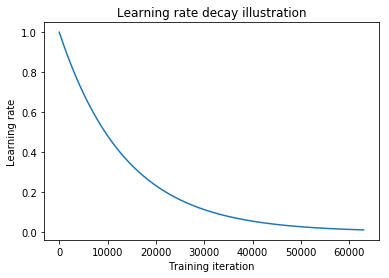

In [9]:
_plot_learning_rate_decay(1, 0.01, train_size)

In [51]:
start_learning_rate = 2
end_learning_rate = 0.5
learning_rates = momentum_range(start_learning_rate, end_learning_rate, train_size)

In [52]:
nn_mnist = NeuralNetwork(
    layers=[
        Linear(n_in=784,
               n_out=50,
               activation_function=sigmoid, 
               random_seed=1, 
               learning_rates=learning_rates),
        Linear(n_in=50,
               n_out=10,
               activation_function=sigmoid, 
               random_seed=2, 
               learning_rates=learning_rates)
        ]
    )

In [53]:
for i in indices:
    x = np.array(X_train[i], ndmin=2)
    y = np.array(Y_train[i], ndmin=2)
    neural_net_pass(nn_mnist, x, y)

In [54]:
P = nn_mnist.forwardpass(X_test)
preds = [np.argmax(x) for x in P]
actuals = [np.argmax(x) for x in Y_test]

In [55]:
accuracy = sum(np.array(preds) == np.array(actuals)) * 1.0 / len(preds)
numpy_round(accuracy, 3)

0.915

## Test momentum factors

In [62]:
start_learning_rate = 1.0 * factor 
end_learning_rate = 1.0 / factor
learning_rates = momentum_range(start_learning_rate, end_learning_rate, train_size)
learning_rates[61000:62000]

[0.22574903020545709,
 0.22573764102272048,
 0.22572625241457542,
 0.22571486438099295,
 0.22570347692194401,
 0.22569209003739968,
 0.2256807037273309,
 0.22566931799170878,
 0.22565793283050428,
 0.22564654824368843,
 0.22563516423123225,
 0.22562378079310677,
 0.225612397929283,
 0.22560101563973198,
 0.22558963392442477,
 0.22557825278333235,
 0.22556687221642574,
 0.22555549222367605,
 0.22554411280505424,
 0.22553273396053136,
 0.22552135569007842,
 0.22550997799366654,
 0.22549860087126669,
 0.22548722432284993,
 0.2254758483483873,
 0.22546447294784985,
 0.22545309812120862,
 0.22544172386843467,
 0.22543035018949903,
 0.22541897708437275,
 0.22540760455302691,
 0.22539623259543251,
 0.22538486121156062,
 0.22537349040138233,
 0.22536212016486867,
 0.22535075050199072,
 0.2253393814127195,
 0.22532801289702611,
 0.2253166449548816,
 0.22530527758625699,
 0.22529391079112343,
 0.22528254456945193,
 0.22527117892121357,
 0.22525981384637941,
 0.22524844934492055,
 0.2252370854168

In [56]:
def test_momentum_factor(factor):
    start_learning_rate = 1.0 * factor 
    end_learning_rate = 1.0 / factor
    learning_rates = momentum_range(start_learning_rate, end_learning_rate, train_size)
    
    nn_mnist = NeuralNetwork(
    layers=[
        Linear(n_in=784,
               n_out=50,
               activation_function=sigmoid, 
               random_seed=1, 
               learning_rates=learning_rates),
        Linear(n_in=50,
               n_out=10,
               activation_function=sigmoid, 
               random_seed=2, 
               learning_rates=learning_rates)
        ]
    )
    
    for i in indices:
        x = np.array(X_train[i], ndmin=2)
        y = np.array(Y_train[i], ndmin=2)
        neural_net_pass(nn_mnist, x, y)
        
    P = nn_mnist.forwardpass(X_test)
    preds = [np.argmax(x) for x in P]
    actuals = [np.argmax(x) for x in Y_test]
    
    accuracy = sum(np.array(preds) == np.array(actuals)) * 1.0 / len(preds)
    return numpy_round(accuracy, 3)

In [58]:
factors = np.arange(1, 5, 0.1)
accuracies = []
for factor in factors:
    print(factor)
    accuracy = test_momentum_factor(factor)
    accuracies.append(accuracy)
    print(accuracy)    

1.0
0.903
1.1
0.746
1.2
0.732
1.3
0.827
1.4
0.825
1.5
0.835
1.6
0.82
1.7
0.76
1.8
0.745
1.9
0.671
2.0
0.905
2.1
0.837
2.2
0.911
2.3
0.911
2.4
0.829
2.5
0.765
2.6
0.826
2.7
0.786
2.8
0.901
2.9
0.907
3.0
0.742
3.1
0.906
3.2
0.741
3.3
0.651
3.4
0.817
3.5
0.87
3.6
0.907
3.7
0.653
3.8
0.642
3.9
0.649
4.0
0.679
4.1
0.815
4.2
0.463
4.3
0.645
4.4
0.579
4.5
0.712
4.6
0.896
4.7
0.652
4.8
0.492
4.9
0.599


In [65]:
pd.DataFrame({'factors': factors, 'accuracies': accuracies}).sort_values('accuracies', ascending=Falst)

NameError: name 'Falst' is not defined

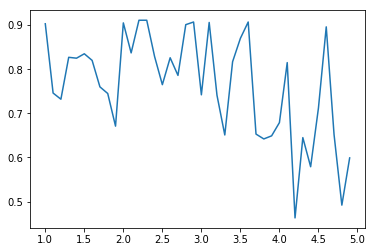

In [59]:
plt.plot(factors, accuracies)

# Testing

In [ ]:
def set_learning_rate(learning_rates, iteration):
    if len(learning_rates) == 0:
        current_learning_rate = 1
    else: 
        current_learning_rate = list_index_wraparound(learning_rates, 
                                                      iteration)
        print("In this iteration of backprop, the learning rate is ", 
              current_learning_rate)
    return current_learning_rate

In [ ]:
learning_rates = [0.2, 0.1]
iteration = 0
set_learning_rate(learning_rates, iteration)

In [13]:
P = nn_mnist.forwardpass(X_test)
preds = [np.argmax(x) for x in P]
actuals = [np.argmax(x) for x in Y_test]